## LA Robot Café Market Analysis

---

### **Project Goal**

The primary objective is to conduct a comprehensive market analysis of the Los Angeles food service industry to secure investment for a new **robot-staffed coffee shop**.

The deliverable is a **final conclusion with specific recommendations** detailing the:
* **Most appropriate establishment type.**
* **Ideal seating capacity.**
* **Strategic outlook for developing a scalable chain** in the LA market, ensuring long-term success after the novelty of the robot waiters fades.

---

### **Analytical Steps**

1.  **Data Preparation:** Load, clean, and validate the open-source LA restaurant dataset (`/datasets/rest_data_us_upd.csv`).
2.  **Market Structure:**
    * Examine the distribution and proportions of **establishment types** (e.g., café, bar).
    * Analyze the ratio and characteristics of **chain vs. non-chain** businesses.
3.  **Capacity Analysis:**
    * Determine the **average number of seats** for each restaurant type.
    * Identify the type with the highest average capacity.
4.  **Geographical Analysis:**
    * Identify the **top 10 streets** by restaurant density.
    * Analyze the **seat distribution** on high-concentration streets to inform location strategy.

### **Key Questions to Answer**

* Which establishment type is typical for successful chains?
* Do chains in LA favor high-volume/low-capacity or low-volume/high-capacity models?

# 1. Data Preparation

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
# Load Data
df= pd.read_csv('/datasets/rest_data_us_upd.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [4]:
# Check for Missing Values
print(df.isna().sum())

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64


In [5]:
# Check Unique Values in Key Columns 
print(df['object_type'].unique())
print(df['chain'].unique()[:20])

['Cafe' 'Restaurant' 'Fast Food' 'Bakery' 'Bar' 'Pizza']
[False True nan]


In [6]:
# Convert object_type to Category Data Type 
df['object_type'] = df['object_type'].astype('category')

# Convert chain to Boolean
df['chain'] = df['chain'].astype('boolean')

In [7]:
# Check and Handle Missing Values in chain
print(df['chain'].isna().sum())


3


In [8]:
# Drop Missing Values 
df = df.dropna(subset=['chain'])
print(df['chain'].isna().sum())
print(df['chain'].value_counts(dropna=False))


0
False    5972
True     3676
NaN         0
Name: chain, dtype: Int64


In [9]:
# Check for Duplicates
print(df.duplicated().sum())


0


In [10]:
# Display Top 10 Rows
print(df.head(10))

      id          object_name                          address  chain  \
0  11786  HABITAT COFFEE SHOP           3708 N EAGLE ROCK BLVD  False   
1  11787             REILLY'S                100 WORLD WAY 120  False   
2  11788       STREET CHURROS          6801 HOLLYWOOD BLVD 253  False   
3  11789    TRINITI ECHO PARK               1814 W SUNSET BLVD  False   
4  11790               POLLEN               2100 ECHO PARK AVE  False   
5  11791       THE SPOT GRILL              10004 NATIONAL BLVD  False   
6  11792                  CPK                100 WORLD WAY 126  False   
7  11793             PHO LALA            3500 W 6TH ST STE 226  False   
8  11794           ABC DONUTS  3027 N SAN FERNANDO RD UNIT 103   True   
9  11795             UPSTAIRS             3707 N CAHUENGA BLVD  False   

  object_type  number  
0        Cafe      26  
1  Restaurant       9  
2   Fast Food      20  
3  Restaurant      22  
4  Restaurant      20  
5  Restaurant      14  
6  Restaurant     100  
7  R

# 2. Analyze Market Structure

# 2.1 Establishment Types Distribution

In [12]:
# Count Establishments by Type 
type_counts = df['object_type'].value_counts(normalize=True) * 100
print(type_counts)

Restaurant    75.176202
Fast Food     11.048922
Cafe           4.508706
Pizza          3.306385
Bar            3.026534
Bakery         2.933250
Name: object_type, dtype: float64


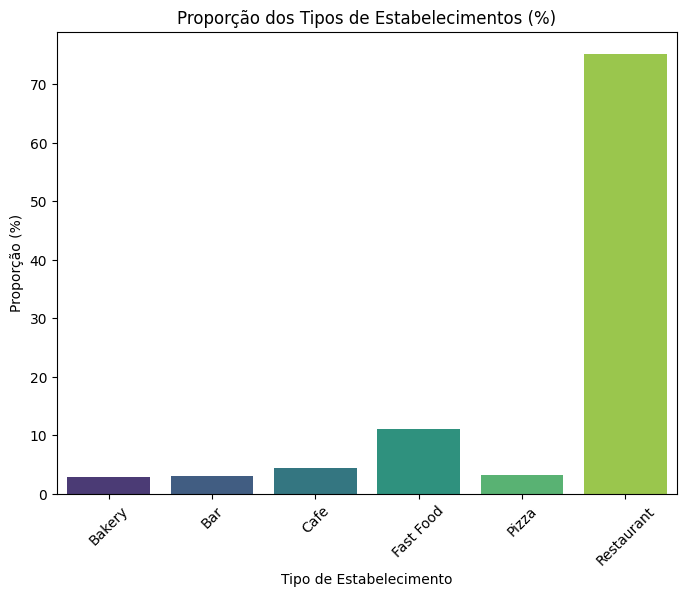

In [14]:
# Plot Bar Chart
plt.figure(figsize=(8,6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title(' Establishment Type Proportion (%) ')
plt.ylabel('Proportion (%)')
plt.xlabel('Establishment Type')
plt.xticks(rotation=45)
plt.show()

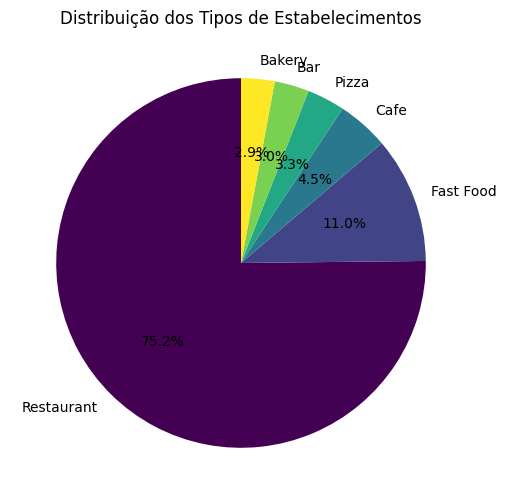

In [16]:
# Plot Pie Chart
plt.figure(figsize=(6,6))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90, colormap='viridis')
plt.ylabel('')
plt.title('Distribution of Establishment Types')
plt.show()

# 2.2 Analyze Chain vs. Non-Chain Proportion

In [17]:
# Count Chain vs. Non-Chain Establishments 
chain_counts = df['chain'].value_counts(dropna=False)

print(chain_counts)

False    5972
True     3676
NaN         0
Name: chain, dtype: Int64


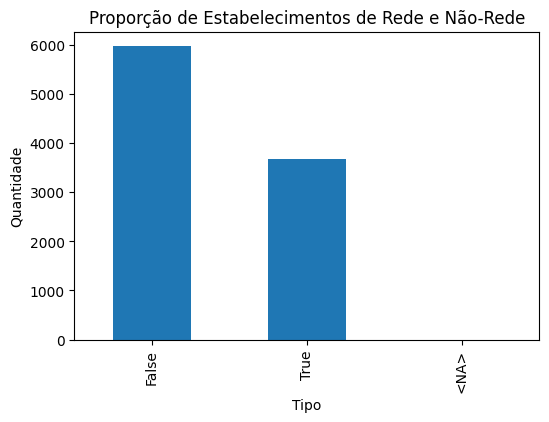

In [18]:
# Plot Bar Chart 
chain_counts.plot(kind='bar', figsize=(6,4))
plt.title('Chain vs. Non-Chain Establishment Proportion')
plt.xlabel('Establishment Type')
plt.ylabel('Number of Establishments')
plt.show()

In [19]:
# Compare Establishment Types by Chain Status
chain_by_type = df.groupby('object_type')['chain'].value_counts(normalize=True).unstack()

print(chain_by_type)

chain           False     True 
object_type                    
Bakery            NaN  1.000000
Bar          0.736301  0.263699
Cafe         0.388506  0.611494
Fast Food    0.432458  0.567542
Pizza        0.520376  0.479624
Restaurant   0.683993  0.316007


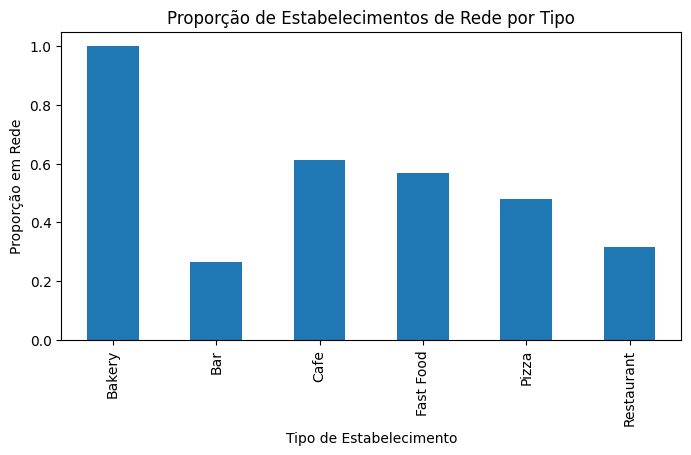

In [20]:
#  Bar Plot: Proportion of Chain Establishments (True)
chain_by_type[True].plot(kind='bar', figsize=(8,4))
plt.title('Proportion of Chain Establishments by Type')
plt.xlabel('Establishment Type')
plt.ylabel('Chain Proportion ')
plt.show()

# 2.3 Seating Capacity Analysis

In [23]:
# Compare Seating Capacity: Chain vs. Non-Chain
df.groupby('chain')['number'].describe()


,count,mean,std,min,25%,50%,75%,max
chain,,,,,,,,
False,5972.0,46.171467,49.875746,1.0,14.0,28.0,47.0,229.0
True,3676.0,39.694233,43.437212,1.0,13.0,25.0,44.0,229.0


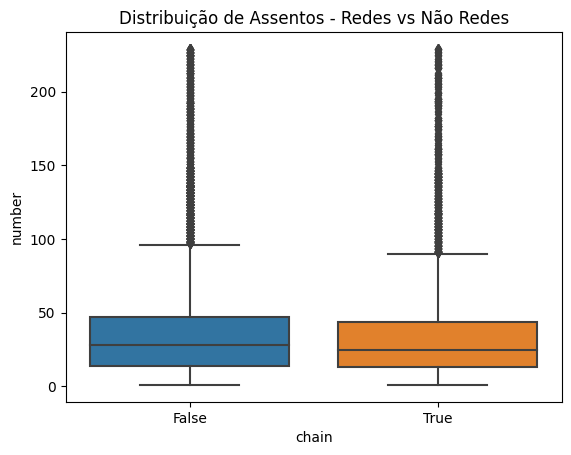

In [22]:
# Stacked Bar and Line Combo Chart
sns.boxplot(x='chain', y='number', data=df)
plt.title('Distribuição de Assentos - Redes vs Não Redes')
plt.show()

Chain restaurants in Los Angeles predominantly adopt a high-volume, low-capacity expansion model.

This strategy favors opening a large number of smaller outlets (like fast food and cafés) over investing in a few large establishments. The goal is to maximize city-wide reach and accessibility rather than optimizing for high individual store seating capacity.

In [24]:
# Average Number of Seats Per Establishment Type
print(df.groupby('object_type')['number'].mean())

object_type
Bakery        21.773852
Bar           44.767123
Cafe          25.000000
Fast Food     31.837711
Pizza         28.545455
Restaurant    48.048807
Name: number, dtype: float64


In [25]:
# Which Type Has the Highest Average Seating Capacity?
print(df.groupby('object_type')['number'].mean().sort_values(ascending=False))

object_type
Restaurant    48.048807
Bar           44.767123
Fast Food     31.837711
Pizza         28.545455
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64


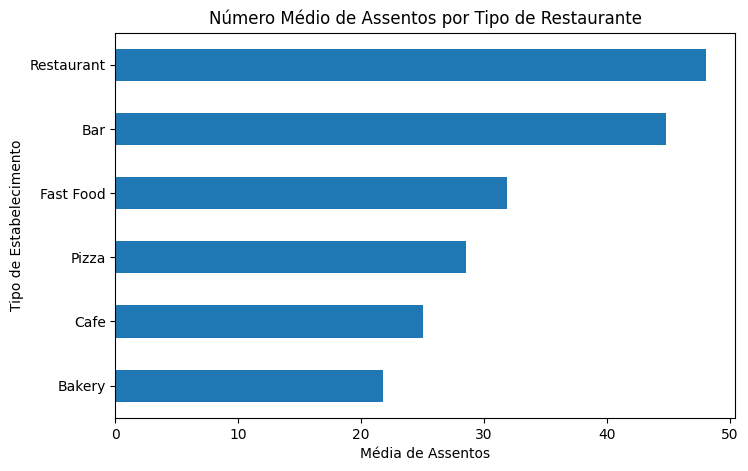

In [26]:
# Plot Bar Chart
df.groupby('object_type')['number'].mean().sort_values().plot(
    kind='barh', figsize=(8,5)
)

plt.title('Average Seating Capacity per Establishment Type')
plt.xlabel('Average Seating Capacity')
plt.ylabel('Establishment Type')
plt.show()

In [27]:
# Feature Engineering: Extract Street Name 
df['street_name'] = df['address'].str.split(',').str[0]

print(df[['address', 'street_name']].head(10))


                           address                      street_name
0           3708 N EAGLE ROCK BLVD           3708 N EAGLE ROCK BLVD
1                100 WORLD WAY 120                100 WORLD WAY 120
2          6801 HOLLYWOOD BLVD 253          6801 HOLLYWOOD BLVD 253
3               1814 W SUNSET BLVD               1814 W SUNSET BLVD
4               2100 ECHO PARK AVE               2100 ECHO PARK AVE
5              10004 NATIONAL BLVD              10004 NATIONAL BLVD
6                100 WORLD WAY 126                100 WORLD WAY 126
7            3500 W 6TH ST STE 226            3500 W 6TH ST STE 226
8  3027 N SAN FERNANDO RD UNIT 103  3027 N SAN FERNANDO RD UNIT 103
9             3707 N CAHUENGA BLVD             3707 N CAHUENGA BLVD


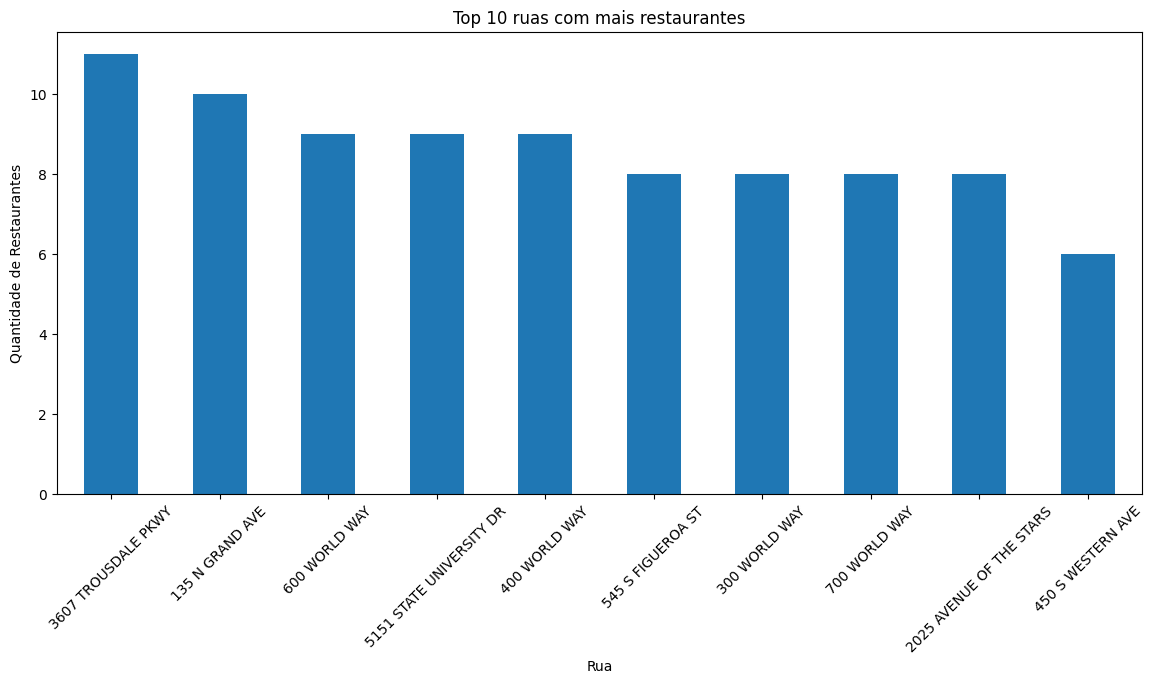

In [34]:
# Count Restaurants Per Street
top_streets = df['street_name'].value_counts().head(10)

# Plot Bar Chart
plt.figure(figsize=(14,6))
top_streets.plot(kind='bar')
plt.title('Top 10 Streets by Restaurant Count')
plt.xlabel('Street')
plt.ylabel('Restaurant Count')
plt.xticks(rotation=45)
plt.show()

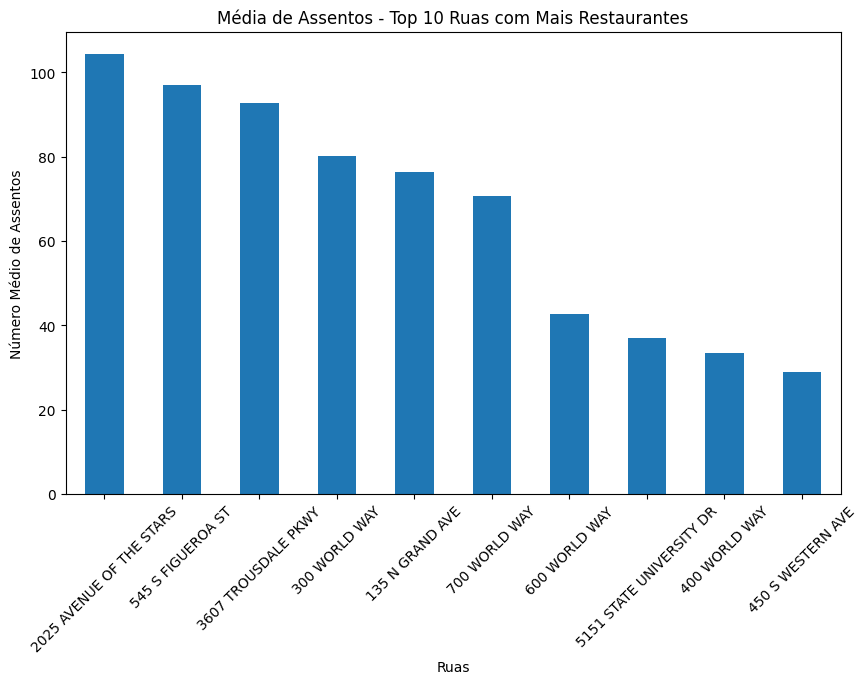

In [42]:

# Calculate Mean Seating Capacity for Top 10 Streets
top10_ruas = df['street_name'].value_counts().head(10).index
media_assentos = df[df['street_name'].isin(top10_ruas)].groupby('street_name')['number'].mean()

# Plot Bar Chart
media_assentos.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))

plt.title("Average Seating Capacity on Top 10 High-Density Streets ")
plt.xlabel("Street")
plt.ylabel("Average Seating Capacity")
plt.xticks(rotation=45)
plt.show()

In [36]:
# Count Restaurants Per Street 
rua_counts = df['street_name'].value_counts()

# Filter Streets with Only One Restaurant
ruas_um_rest = rua_counts[rua_counts == 1]

# Display Total Count of Single-Establishment Streets 
print("Total Count of Single-Establishment Streets:", len(ruas_um_rest))

Número de ruas com apenas 1 restaurante: 7593


In [37]:
# Select Top 10 Streets by Restaurant Count 
top_streets = df['street_name'].value_counts().head(10).index


# Filter Data for Top 10 Streets Only
df_top_streets = df[df['street_name'].isin(top_streets)]


In [1]:
# Boxplot of Seating Capacity on Top 10 Streets
plt.figure(figsize=(12,6))
sns.boxplot(x='street_name', y='number', data=df_top_streets)
plt.xticks(rotation=45)
plt.title(' Seating Capacity Distribution on Top 10 Streets')
plt.show()


NameError: name 'plt' is not defined

# 3.Final Project Conclusion and Strategic Recommendation

This analysis of the Los Angeles food service market structure provides key insights into successful expansion strategies, particularly for a chain with an innovative concept.

### Market Structure Summary

The market is defined by two major characteristics:
1.  **Dominance of Quick Service:** The vast majority of establishments fall into the **Fast Food** and **Café** categories, reflecting high demand for quick, accessible food service.
2.  **Chain Strategy: Volume Over Capacity:** **Chains** overwhelmingly prioritize an **expansive, low-capacity model**. They operate a large number of smaller units, aiming for city-wide reach rather than maximizing seating capacity in any single location. The average seat count for a chain location is significantly lower than for independent establishments.

### Geographic and Seating Trends

The location analysis highlights a clear correlation between street type and seating strategy:

* **Traffic Centers (e.g., World Way):** These streets, often near airports or major transit points, are saturated with **high-volume, low-capacity** restaurants (under $\text{30}$ seats), built for rapid turnover (e.g., Fast Food, Cafés).
* **Central/Prestigious Areas (e.g., Avenue of the Stars, S Figueroa St):** These areas show **higher median seating capacity** and significant **variance**, suggesting competition between formal, larger restaurants and smaller, high-end spots.

### Strategic Recommendation for an Innovative Café Chain (with Robot Servers)

Based on the market structure and trends, the following strategy is recommended for establishing and scaling an innovative café chain:

#### 1. Optimal Concept and Capacity
The concept should target the **Café** or **Fast Food** segments, aligning with market demand and the successful chain expansion model. The ideal capacity for new units should be **between $\text{30}$ and $\text{40}$ seats**. This size is large enough to handle moderate flow (utilizing the robot efficiency) but small enough to maintain the low-footprint, high-replication model successful for chains.

#### 2. Expansion Strategy (High-Growth Viability)
A **Chain Strategy is highly viable**. The expansion should focus on **quantity of units** and **geographical saturation**, not on building large, expensive flagship locations. Each unit must be standardized, efficient, and replicable.

#### 3. Competitive Location Assessment
The chain must decide on its primary competition:
* **Avoid High-Density Traffic Centers (e.g., World Way):** While the flow is high, these areas are saturated with hyper-efficient, small units, making competition on speed difficult, even with robots.
* **Target Medium-to-High Flow Corridors:** Ideal locations are areas with moderate-to-high traffic that are **not yet saturated** with competitor chains (e.g., Western Avenue or near state universities). These offer a balance of customer flow and opportunity to establish a presence before the market matures.

In summary, the most promising model is to execute an **efficient, low-capacity, high-volume café chain** that uses its innovation to gain a competitive edge in underserved, high-potential flow areas.